In [5]:
import numpy
import matplotlib.pyplot as plt

In [6]:
#The key k is a list/array of 16 bytes
def rc4_init(k):
    k = numpy.tile(k, 16)
    S = list( range(256) )
    
    j = 0
    for i in range(256):
        j = (j + S[i] + k[i]) % 256
        S[i], S[j] = S[j], S[i]
    
    return (S, 0, 0)

In [7]:
def rc4_next(st):
    S, i, j = st
    
    i = (i + 1) % 256
    j = (j + S[i]) % 256
    
    S[i], S[j] = S[j], S[i]

    t = (S[i] + S[j]) % 256
    y = S[t]
    
    return ( y, (S, i, j) )

In [8]:
#Returns the first ell bytes output by RC4 initialized with key k
def get_bytes(k, ell):
    state = rc4_init(k)
    
    output = []
    for i in range(ell):
        y, state = rc4_next(state)
        output.append(y)
    
    return output

In [14]:
# This is the key 0x0102030405060708090A0B0C0D0E0F10
test_key = list( range(1, 17) )

In [15]:
# Check that the first 32 bytes output using the test key match the test vectors for RC4
for b in get_bytes(test_key, 32):
    print("%02x" % b, end=" ")

9a c7 cc 9a 60 9d 1e f7 b2 93 28 99 cd e4 1b 97 52 48 c4 95 90 14 12 6a 6e 8a 84 f1 1d 1a 9e 1c 

In [19]:
def random_key():
    return numpy.random.randint(0, 256, 16)

In [27]:
# Collects the n-th bytes output RC4 using many (20000) random keys, then plots an histogram of the bytes' values 
def plot_nth_byte(n):
    nth_bytes = [ get_bytes(random_key(), n)[-1] for i in range(20000) ]
    plt.hist(nth_bytes, bins=256, density=True); plt.ylim([0, 0.0085]);

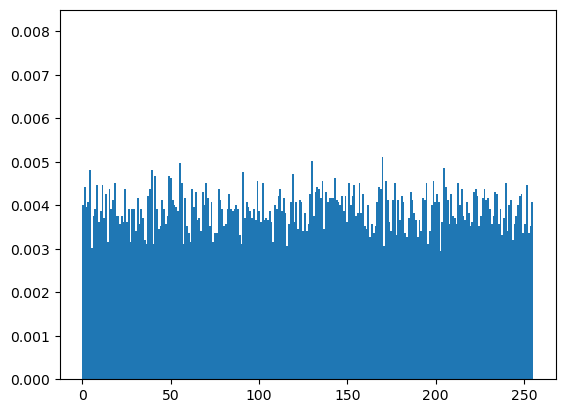

In [28]:
plot_nth_byte(1)

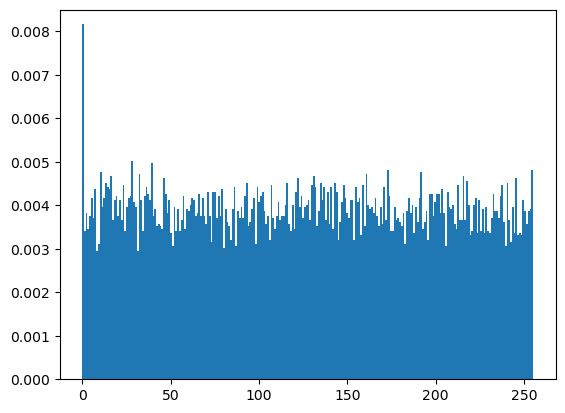

In [29]:
plot_nth_byte(2)